### Importing The Dependencies

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Data Collection & Analysis
+ Pima Diabetes Dataset

In [19]:
# Loading diabetes dataset
diabetes_dataset=pd.read_csv('diabetes.csv')

In [20]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
diabetes_dataset.shape

(768, 9)

In [22]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [26]:
correlation=diabetes_dataset.corr()

<AxesSubplot: >

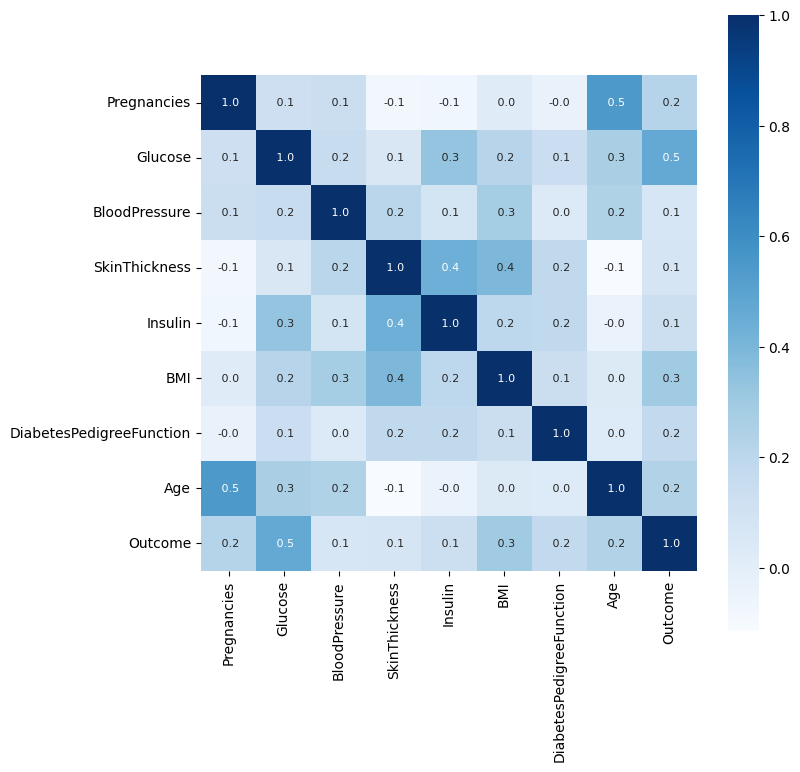

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8}, fmt=' .1f',cmap='Blues')

In [32]:
print(correlation['Pregnancies'])

Pregnancies                 1.000000
Glucose                     0.129459
BloodPressure               0.141282
SkinThickness              -0.081672
Insulin                    -0.073535
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
Name: Pregnancies, dtype: float64


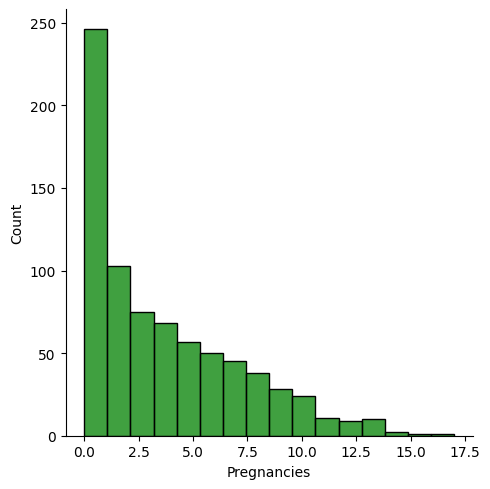

In [36]:
sns.displot(diabetes_dataset['Pregnancies'],color='green')

### Splitting or Seperating The Dataset  for Training and Testing

In [37]:
X=diabetes_dataset.drop(columns='Outcome', axis=1)
y=diabetes_dataset['Outcome']

In [38]:
X.shape

(768, 8)

In [39]:
y.shape

(768,)

In [40]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [41]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Standardize The Dataset

In [44]:
scaler=StandardScaler()

In [45]:
scaler.fit(X)

StandardScaler()

In [46]:
Standardized_data=scaler.transform(X)

In [47]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [48]:
X=Standardized_data
y=diabetes_dataset['Outcome']

In [49]:
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test Split

In [50]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=2)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [53]:
print(y.shape,y_train.shape,y_test.shape)

(768,) (614,) (154,)


### Train The Model

In [54]:
classifier=svm.SVC(kernel='linear')

In [55]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

### Evaluate The Model
+ Accuracy Score

In [56]:
# Accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, y_train)

In [57]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [58]:
# Accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction, y_test)

In [59]:
print('Accuracy score of the testing data : ',testing_data_accuracy)

Accuracy score of the testing data :  0.7727272727272727


### Making a Predictive System

In [62]:
input_data=(10,168,74,0,0,38,0.537,34)

# Change input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data =scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('The person is not a diabetes')

else:
    print('The person is a diabetes')

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]
The person is a diabetes


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
import pickle

In [65]:
filename= 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))